In [1]:
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.metrics import categorical_accuracy

size_ = 64

model = Sequential()

model.add(Conv2D(128, (5, 5), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(128, (5, 5), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(256, (5, 5), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(256, (3, 3), input_shape = (size_, size_, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(units = 4, activation = 'softmax'))
model.compile(optimizer = 'sgd', loss = 'categorical_crossentropy', metrics = [categorical_accuracy])

Using TensorFlow backend.


In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 60, 60, 128)       9728      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       409728    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 256)         819456    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 256)        

In [5]:
train = ImageDataGenerator(rescale = 1./255)
test = ImageDataGenerator(rescale = 1./255)
train_data = train.flow_from_directory('dataset/training', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')
test_data = test.flow_from_directory('dataset/testing', target_size = (size_, size_), batch_size = 32, class_mode = 'categorical')

Found 12800 images belonging to 4 classes.
Found 3200 images belonging to 4 classes.


In [6]:
history=model.fit_generator(train_data, steps_per_epoch = 100, epochs = 50, validation_data = test_data, validation_steps = 100)

Epoch 1/50
100/100 [==============================] - 23s 233ms/step - loss: 1.2496 - categorical_accuracy: 0.4078 - val_loss: 0.8872 - val_categorical_accuracy: 0.5875
Epoch 2/50
100/100 [==============================] - 10s 101ms/step - loss: 0.9504 - categorical_accuracy: 0.5619 - val_loss: 0.9889 - val_categorical_accuracy: 0.6231
Epoch 3/50
100/100 [==============================] - 10s 102ms/step - loss: 0.8306 - categorical_accuracy: 0.6116 - val_loss: 0.8402 - val_categorical_accuracy: 0.6491
Epoch 4/50
100/100 [==============================] - 11s 105ms/step - loss: 0.7858 - categorical_accuracy: 0.6438 - val_loss: 0.6297 - val_categorical_accuracy: 0.6422
Epoch 5/50
100/100 [==============================] - 11s 106ms/step - loss: 0.7445 - categorical_accuracy: 0.6725 - val_loss: 0.8174 - val_categorical_accuracy: 0.6369
Epoch 6/50
100/100 [==============================] - 11s 108ms/step - loss: 0.6963 - categorical_accuracy: 0.6922 - val_loss: 0.9891 - val_categorical_acc

100/100 [==============================] - 11s 107ms/step - loss: 0.0422 - categorical_accuracy: 0.9894 - val_loss: 0.4408 - val_categorical_accuracy: 0.8269
Epoch 50/50
100/100 [==============================] - 11s 108ms/step - loss: 0.0560 - categorical_accuracy: 0.9844 - val_loss: 0.3986 - val_categorical_accuracy: 0.8413


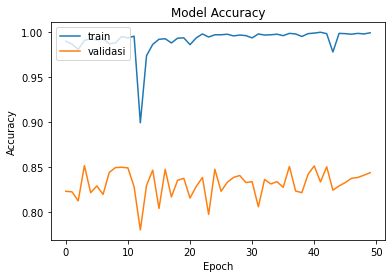

In [12]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validasi'], loc='upper left')
plt.show()

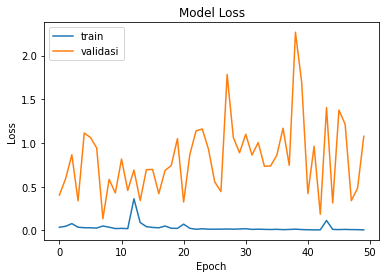

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validasi'], loc='upper left')
plt.show()